**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# mounting google drive 
from google.colab import drive
drive.mount('/content/drive')

# import data 2C_weka.csv for 2 Class Classifcation.


In [0]:
twoclass_data = pd.read_csv('/content/drive/My Drive/Datasets/2Classdata.csv')

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [3]:
twoclass_data.sample(5)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
111,84.998956,29.610098,83.352194,55.388858,126.912990,71.321175,Abnormal
140,69.563486,15.401139,74.438497,54.162347,105.067356,29.701211,Abnormal
207,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Abnormal
274,43.191915,9.976664,28.938149,33.215251,123.467400,1.741018,Normal
91,70.952728,20.159931,62.859109,50.792797,116.177932,32.522331,Abnormal


In [4]:
twoclass_data.shape

(310, 7)

In [5]:
twoclass_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
pelvic_incidence,310,NaN,NaN,NaN,60.4967,17.2365,26.1479,46.4303,58.691,72.8777,129.834
pelvic_tilt numeric,310,NaN,NaN,NaN,17.5428,10.0083,-6.55495,10.6671,16.3577,22.1204,49.4319
lumbar_lordosis_angle,310,NaN,NaN,NaN,51.9309,18.5541,14,37,49.5624,63,125.742
sacral_slope,310,NaN,NaN,NaN,42.9538,13.4231,13.3669,33.3471,42.4049,52.6959,121.43
pelvic_radius,310,NaN,NaN,NaN,117.921,13.3174,70.0826,110.709,118.268,125.468,163.071
degree_spondylolisthesis,310,NaN,NaN,NaN,26.2967,37.559,-11.0582,1.60373,11.7679,41.2874,418.543
class,310,2,Abnormal,210,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Encode the Class variable to integer.

In [0]:
from sklearn.preprocessing import LabelEncoder

In [7]:
label_encoder = LabelEncoder()
label_encoder.fit(twoclass_data['class'])
twoclass_data['class'] = label_encoder.transform(twoclass_data['class'])
twoclass_data.sample(5)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
185,91.468741,24.508177,84.620272,66.960564,117.307897,52.623047,0
32,44.936675,17.443838,27.780576,27.492837,117.980325,5.569620,0
90,81.656032,28.748869,58.232821,52.907163,114.769856,30.609148,0
49,41.767732,17.899402,20.030886,23.868330,118.363389,2.062963,0
87,44.914149,10.218996,44.630914,34.695154,130.075660,37.364540,0


In [8]:
# let's check encoded value
label_encoder.inverse_transform([0,1])

array(['Abnormal', 'Normal'], dtype=object)

In [0]:
# Let's identify X(feature) and y(label or target)
y = twoclass_data['class']
X = twoclass_data.drop(['class'], axis=1)

In [78]:
# Let's look at the data
X.head(5)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [79]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

# Split the dat as train and test with a ratio of 70:30.

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [102]:
X_train.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
274,43.191915,9.976664,28.938149,33.215251,123.467400,1.741018
138,72.054034,24.700737,79.874016,47.353297,107.172358,56.426159
37,35.703458,19.443253,20.700000,16.260205,137.540613,-0.263490
257,50.160078,-2.970024,42.000000,53.130102,131.802491,-8.290203
119,60.753894,15.753894,43.199158,45.000000,113.053331,31.693548


In [103]:
X_test.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
275,67.289712,16.717514,51.000000,50.572198,137.591778,4.960344
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750
48,40.557357,17.977784,34.000000,22.579573,121.046246,-1.537383
282,53.683380,13.447022,41.584297,40.236358,113.913703,2.737035


In [104]:
y_train.head()

274    1
138    0
37     0
257    1
119    0
Name: class, dtype: int64

# Normalize your Data (X) to get values between 0 to 1.

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [117]:
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [118]:
scaled_X_train = minmax_scaler.transform(X_train)

scaled_X_train

array([[0.23158506, 0.06403158, 0.25057636, 0.35591516, 0.66373734,
        0.00644313],
       [0.35932061, 0.36919901, 0.30549559, 0.31969384, 0.44987765,
        0.0997266 ],
       [0.16590152, 0.25045929, 0.12587419, 0.19326157, 0.45912804,
        0.0391327 ],
       ...,
       [0.51433169, 0.59455459, 0.50697845, 0.3522808 , 0.5216356 ,
        0.16936351],
       [0.53629645, 0.47651247, 0.50616818, 0.43608079, 0.53063044,
        0.15494616],
       [0.20887692, 0.30799479, 0.35796623, 0.20490539, 0.5947895 ,
        0.02480359]])

In [119]:
scaled_X_test = minmax_scaler.transform(X_test)

scaled_X_test

array([[ 4.91470316e-01,  6.61315428e-01,  4.96504779e-01,
         2.94679232e-01,  4.52411220e-01,  1.90449305e-01],
       [ 2.32063352e-01,  6.48636157e-01,  1.97812202e-01,
         4.77275310e-02,  6.25990971e-01,  3.91032203e-02],
       [ 4.51436730e-01,  4.66751346e-01,  4.20673596e-01,
         3.58259255e-01,  4.42543832e-01,  2.76341596e-02],
       [ 3.72871704e-01,  3.88109727e-01,  4.01280081e-01,
         3.22959648e-01,  4.47339203e-01,  7.55709540e-02],
       [ 2.73476952e-01,  2.38893018e-01,  2.95322136e-01,
         3.04554630e-01,  4.48535171e-01,  1.54827517e-02],
       [ 4.11666479e-01,  5.13932289e-01,  3.22994658e-01,
         2.94461975e-01,  3.86096925e-01,  1.75229033e-02],
       [ 4.70922245e-01,  3.83602004e-01,  3.55550596e-01,
         4.21212621e-01,  3.82443399e-01,  2.94527217e-02],
       [ 3.12227921e-01,  3.65751035e-01,  2.45814112e-01,
         2.75467432e-01,  4.88579125e-01,  9.64758867e-02],
       [ 2.86396721e-01,  6.32334557e-01,  3.015

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [120]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(scaled_X_train, y_train)
knn_model.score(X=X_train, y=y_train)

0.6682027649769585

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [121]:
knn_model.score(X=X_test, y=y_test)

0.6989247311827957

# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [135]:

# optimum K. As we are starting from K=1
optimal_K = 1

# any model can have maximum SME error = 1
optimal_model_accuracy = 1

# Dataframe for storing k and MSE
accuracy_df = pd.DataFrame(index=np.arange(1,24,2), columns=['K', 'Train_accuracy', 'Test_accuracy', 'diff'])

for number_of_neighbor in np.arange(1,24,2):
  #building model
  knn_model = KNeighborsClassifier(n_neighbors=number_of_neighbor)    
  knn_model.fit(scaled_X_train, y_train)    
  # accuracy
  train_accuracy = knn_model.score(X=scaled_X_train, y=y_train)
  test_accuracy = knn_model.score(X=scaled_X_test, y=y_test)

  accuracy_df.loc[number_of_neighbor]['K'] = number_of_neighbor
  accuracy_df.loc[number_of_neighbor]['Train_accuracy'] = train_accuracy
  accuracy_df.loc[number_of_neighbor]['Test_accuracy'] = test_accuracy   
  accuracy_df.loc[number_of_neighbor]['diff'] = train_accuracy - test_accuracy
     
  if((train_accuracy - test_accuracy) < optimal_model_accuracy):
      optimal_model_accuracy = train_accuracy-test_accuracy
      optimal_K = number_of_neighbor

print("The optimal number of neighbour is ", optimal_K)

The optimal number of neighbour is  19


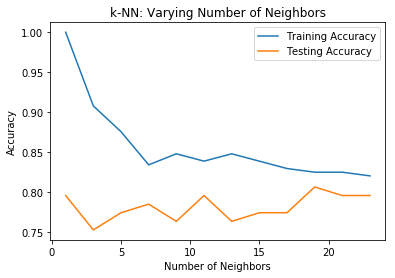

In [136]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(accuracy_df['K'], accuracy_df['Train_accuracy'], label = 'Training Accuracy')
plt.plot(accuracy_df['K'], accuracy_df['Test_accuracy'], label = 'Testing Accuracy')

plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

plt.show()

# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [138]:
threeclass_data = pd.read_csv('/content/drive/My Drive/Datasets/3Classdata.csv')
threeclass_data.shape

(310, 7)

In [139]:
threeclass_data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [140]:
# check for missing value
threeclass_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
pelvic_incidence,310,NaN,NaN,NaN,60.4967,17.2365,26.1479,46.4303,58.691,72.8777,129.834
pelvic_tilt,310,NaN,NaN,NaN,17.5428,10.0083,-6.55495,10.6671,16.3577,22.1204,49.4319
lumbar_lordosis_angle,310,NaN,NaN,NaN,51.9309,18.5541,14,37,49.5624,63,125.742
sacral_slope,310,NaN,NaN,NaN,42.9538,13.4231,13.3669,33.3471,42.4049,52.6959,121.43
pelvic_radius,310,NaN,NaN,NaN,117.921,13.3174,70.0826,110.709,118.268,125.468,163.071
degree_spondylolisthesis,310,NaN,NaN,NaN,26.2967,37.559,-11.0582,1.60373,11.7679,41.2874,418.543
class,310,3,Spondylolisthesis,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
# no value missing observed

# converting categorical data into numerical
from sklearn.preprocessing import LabelEncoder

threeclass_label_encoder = LabelEncoder()
threeclass_data['class'] = threeclass_label_encoder.fit_transform(threeclass_data['class'])
threeclass_data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


In [142]:
# checking assigned values

threeclass_label_encoder.inverse_transform([0,1,2])

array(['Hernia', 'Normal', 'Spondylolisthesis'], dtype=object)

In [0]:
# creating X, y
y = threeclass_data['class']
X = threeclass_data.drop('class', axis=1)

In [0]:
from sklearn.preprocessing import StandardScaler

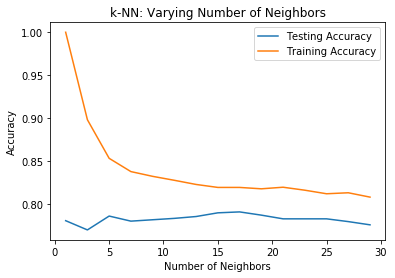

In [152]:
neighbors = np.arange(1, 30, 2)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    for j in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=j)
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,y_train)
        train.append(knn.score(scaledX_train,y_train))
        test.append(knn.score(scaledX_test,y_test))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

k=17 is best fit
